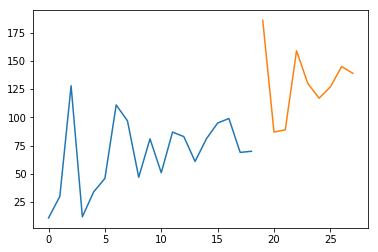

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.collections import LineCollection

from math import sqrt
from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression
from sklearn.utils import check_random_state
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from random import random
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AR

#load the data
data = pd.read_csv('GOLD.csv')

#divide into train and validation set
train = data[:int(0.7*(len(data)))]
valid = data[int(0.7*(len(data))):]

#preprocessing (since arima takes univariate series as input)
#train.drop('Month',axis=1,inplace=True)
#valid.drop('Month',axis=1,inplace=True)

#plotting the data
train['GOLD'].plot()
valid['GOLD'].plot()

In [5]:
#building the model
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

forecast = model.predict(n_periods=len(valid))
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(valid, label='Valid')
plt.plot(forecast, label='Prediction')
plt.show()

ValueError: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 192 from PyObject

In [ ]:
#calculate rmse
from math import sqrt
from sklearn.metrics import mean_squared_error

rms = sqrt(mean_squared_error(valid,forecast))
print(rms)